# Машинне навчання
# Лабораторна робота №1
# Вишотравка Діана СА-33
## Варіант 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as sp
import warnings
warnings.filterwarnings('ignore')
sns.set_palette("tab20b")

In [2]:
def visualize(df, funk, **kwargs):
    columns = df.columns
    num_rows = (len(columns) + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        funk(df[column], ax=ax, **kwargs)
        ax.set_title(f'Visualization of {column}')
    plt.tight_layout()
    plt.show()

In [3]:
def catplot_visualize(df, target, funk, **kwargs):
    columns = df.columns
    num_rows = (len(columns))-1
    fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(15, num_rows * 5))
    for i, column in enumerate(columns):
        if column == target:
            continue
        row = i 
        ax = axes[row]
        funk(df,x = column, y = target, ax=ax, **kwargs)
        ax.set_title(f'Visualization of {column}')
    plt.tight_layout()
    plt.show()

In [4]:
df = pd.read_csv('forestfires.csv')

Первинний аналіз даних: к-сть даних та кількість змінних, типи дани вхідних та вихідної змінної.

In [5]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
print(f'Number of duplicate entries: {df.duplicated().sum()}')
print(f'Number missing: {sum(df.isna().sum())}')
print(f'Number of duplicate entries for certain columns:\n{df[df.duplicated()].index}')
df[df.duplicated()]

Number of duplicate entries: 4
Number missing: 0
Number of duplicate entries for certain columns:
Index([53, 100, 215, 303], dtype='int64')


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


There are 4 duplicated raws in dataset, so they were removed.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(513, 13)

In [10]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Для числових змінних: оцінити параметри дескриптивної статистики, розподіл, наявність статистичних викидів та пропущених даних 

2 Lists with numerical and categorical column name were created, to use in future analysis

In [11]:
numerical = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
categorical = ['X', 'Y', 'month', 'day']

Previously created function were used to visualize the distribution of numerical data as well as properties like minimum, first quartile, median, third quartile, maximum and outliers

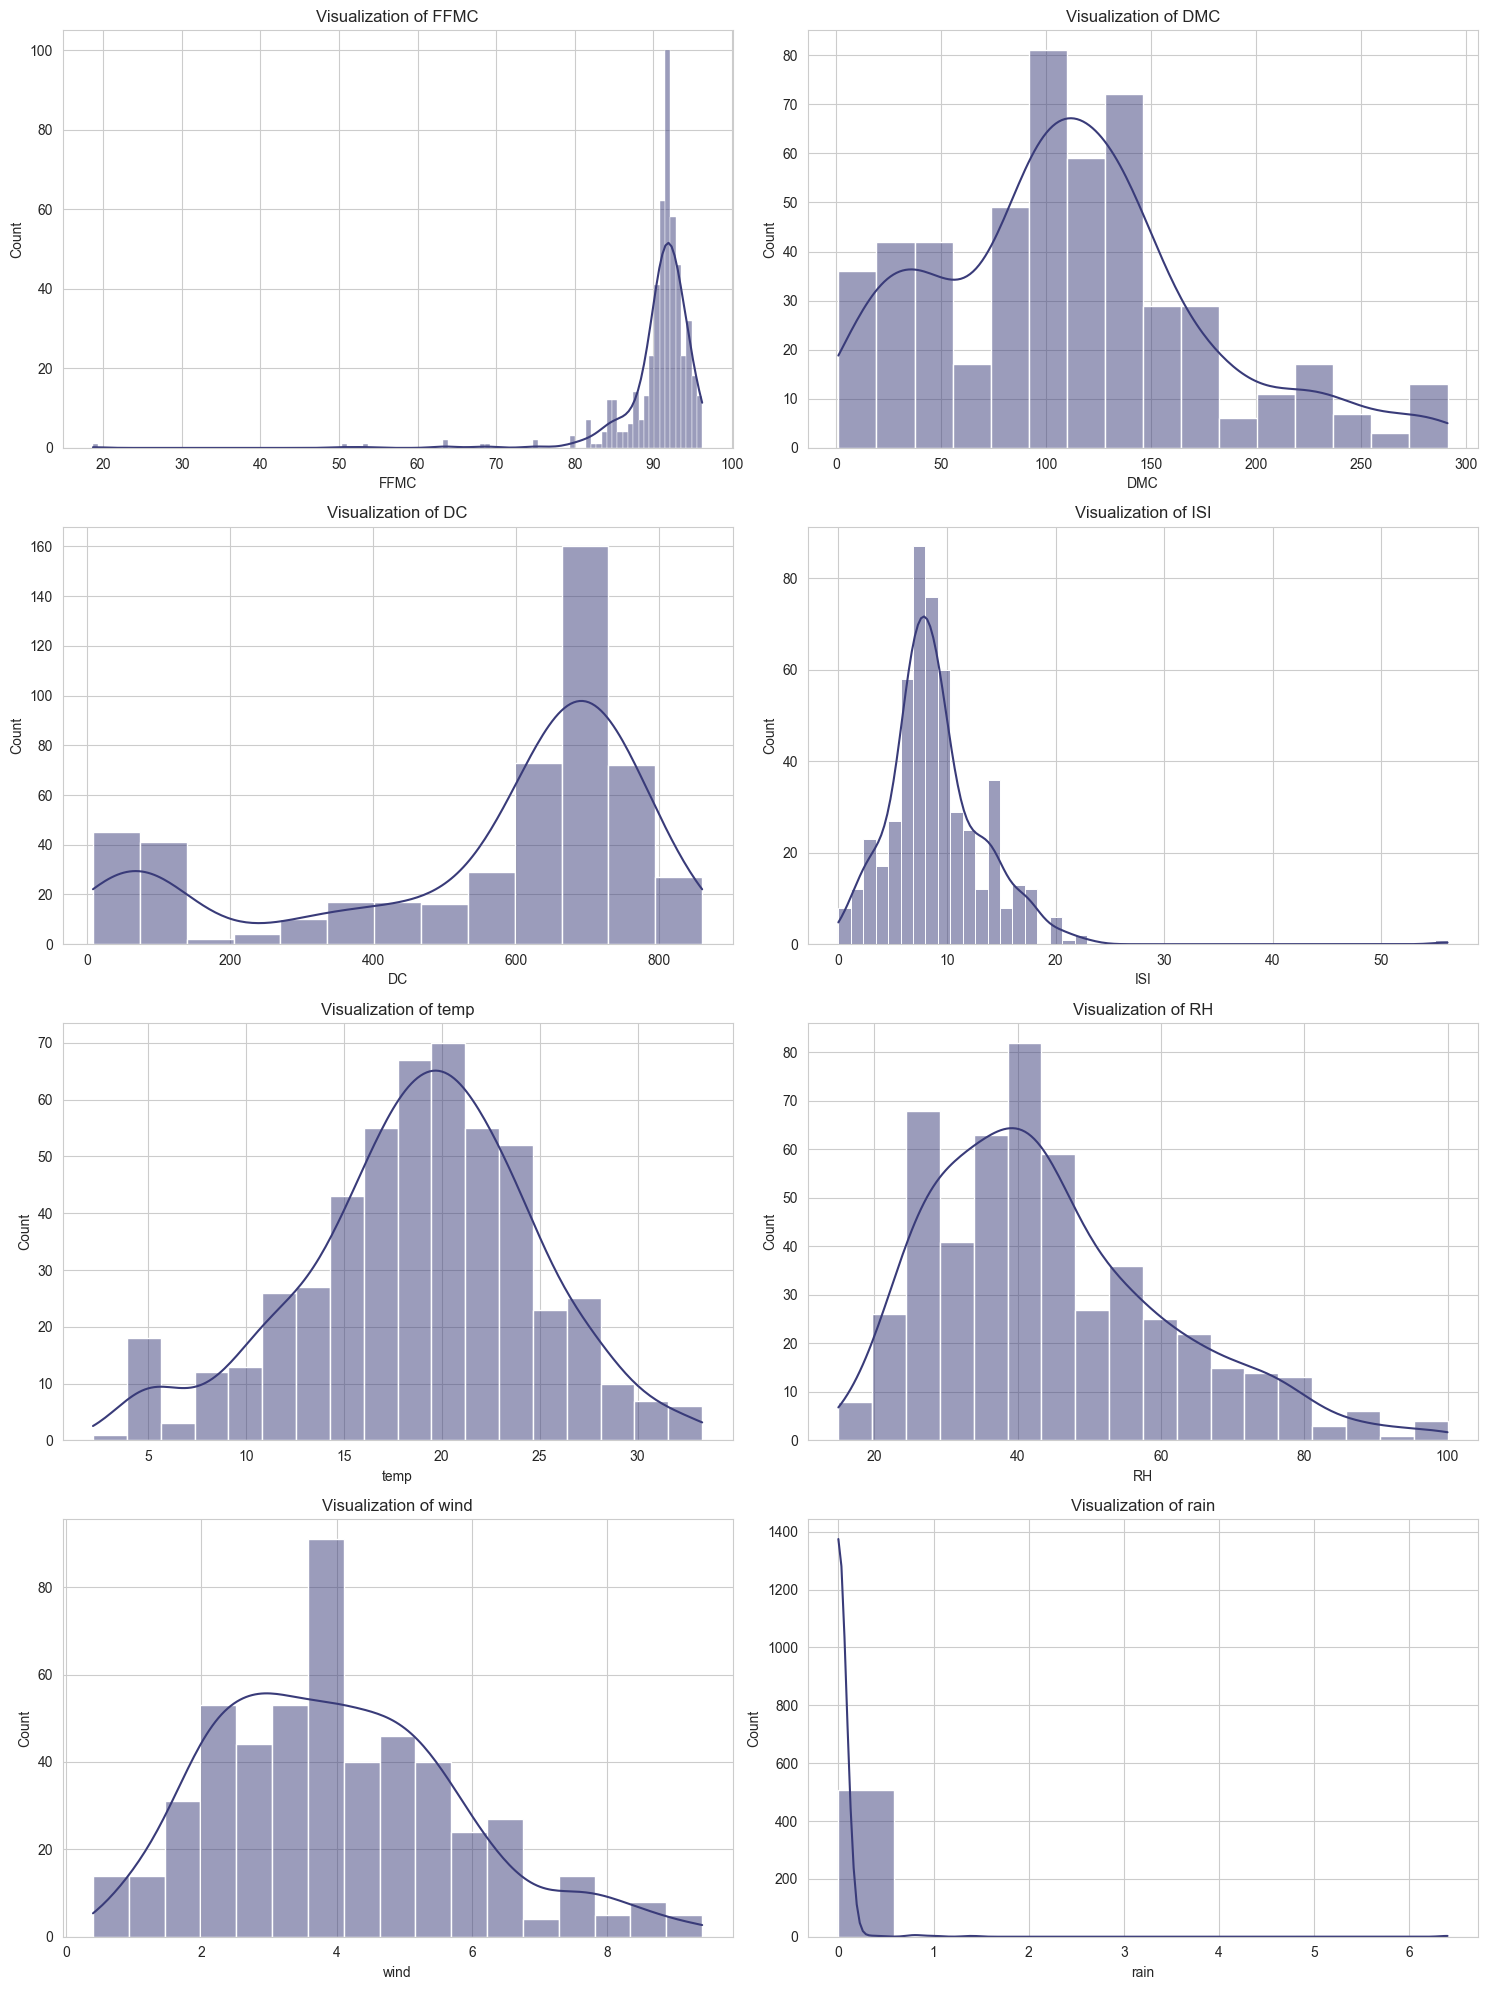

In [12]:
visualize(df.loc[:,numerical[:-1]], sns.histplot, kde = True)

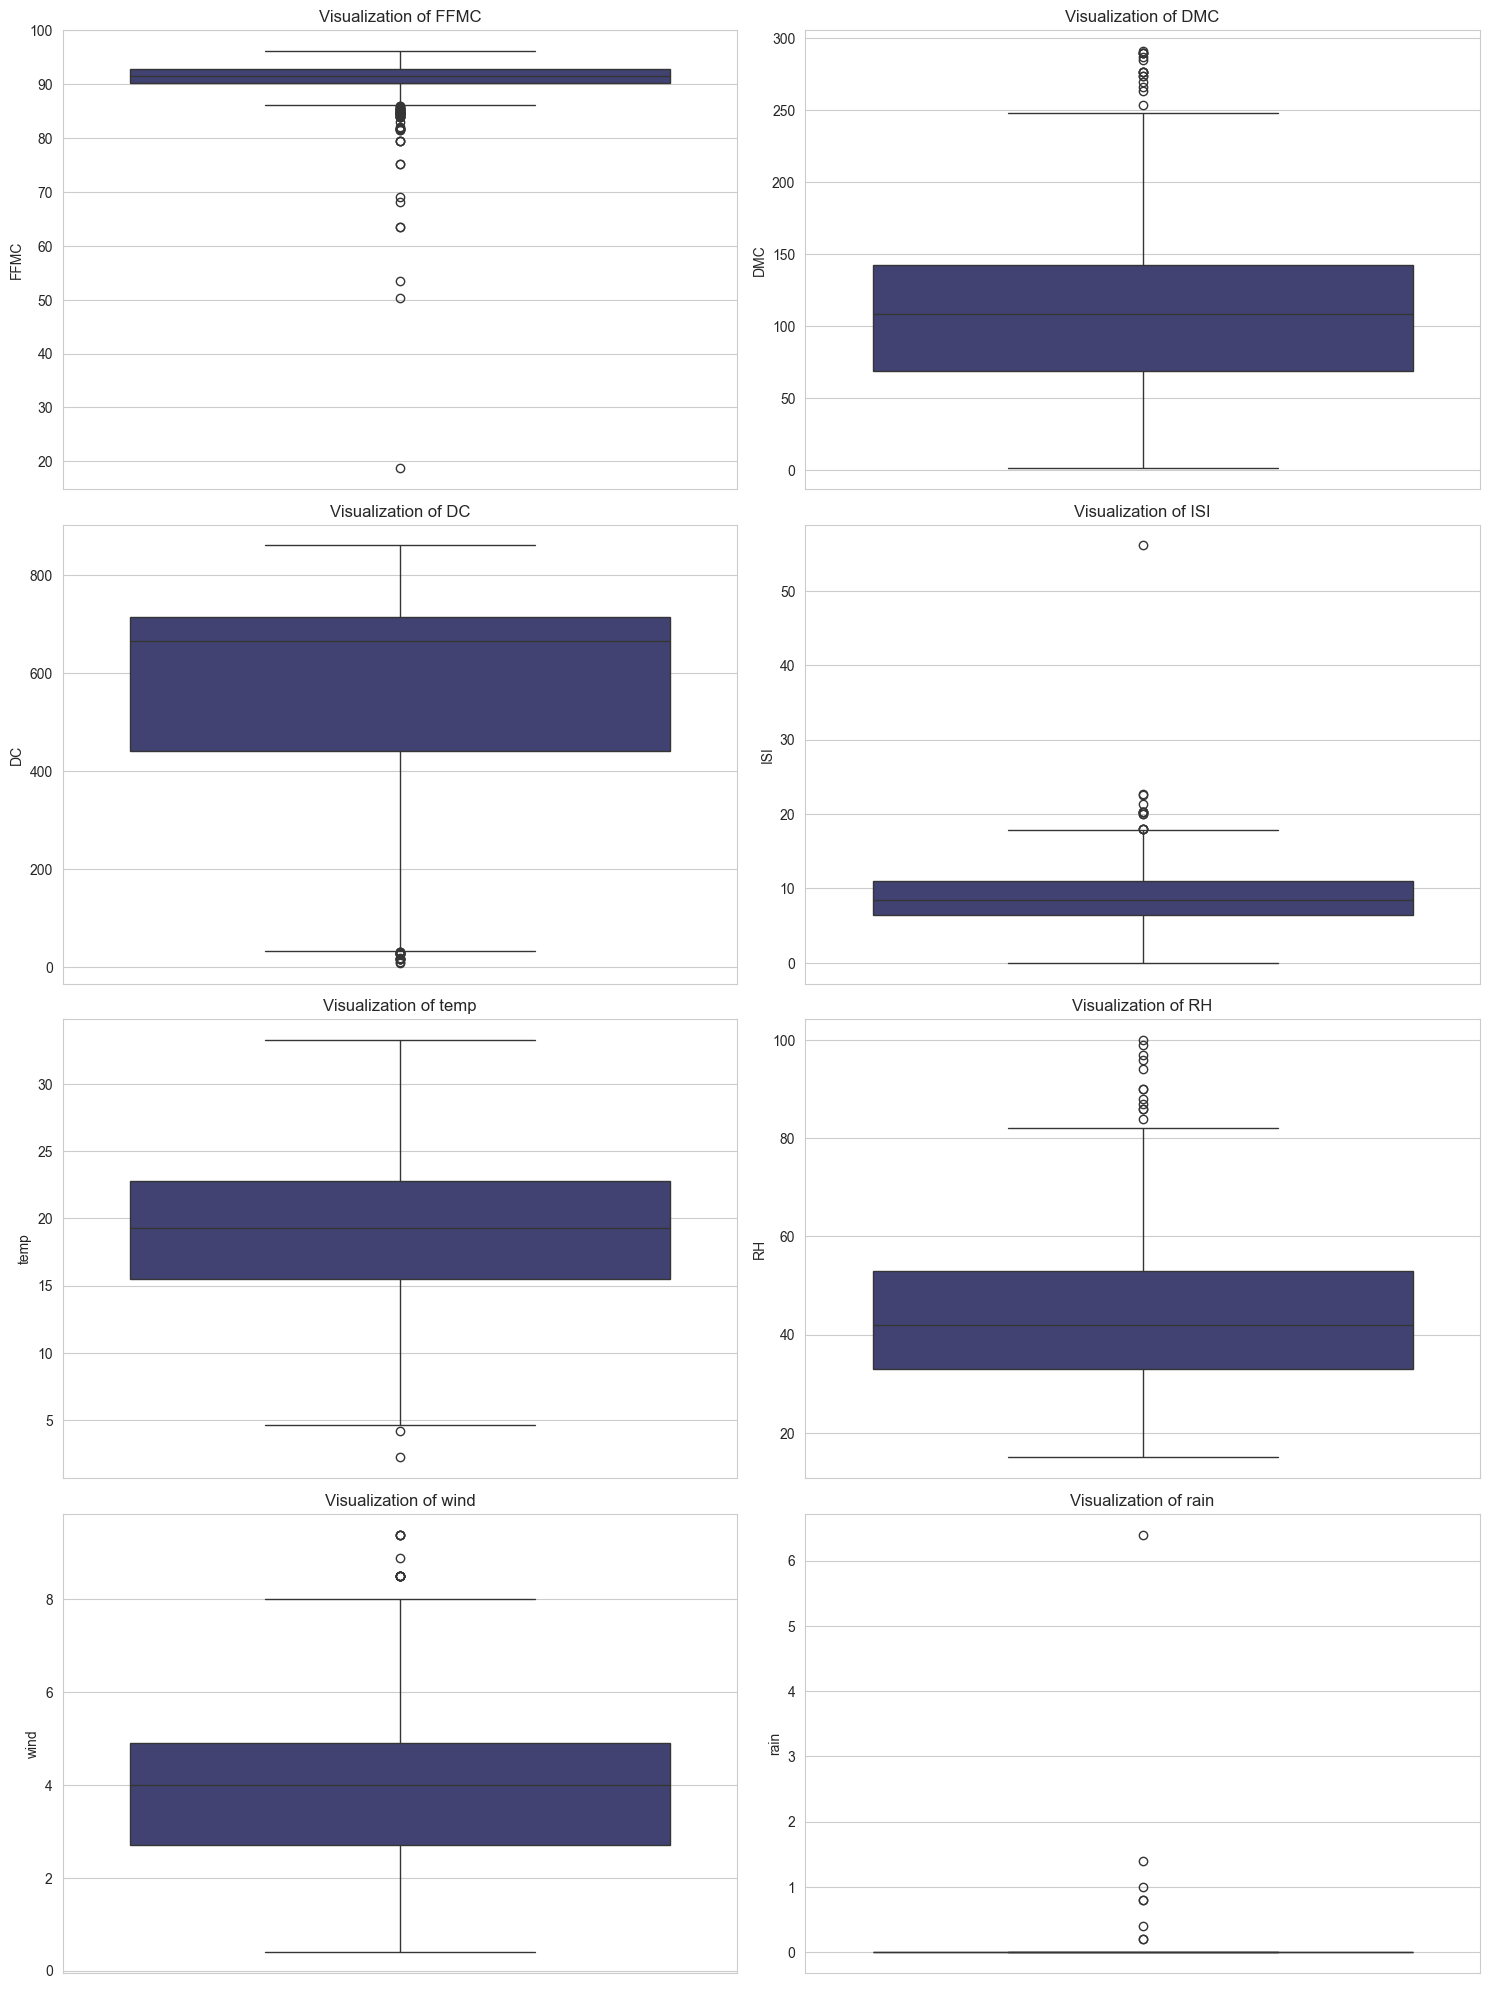

In [13]:
visualize(df.loc[:,numerical[:-1]], sns.boxplot)

The target value was investigated separately

In [14]:
target = df.iloc[:,-1]
target

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 513, dtype: float64

In [15]:
target.describe()

count     513.000000
mean       12.891598
std        63.892586
min         0.000000
25%         0.000000
50%         0.540000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [16]:
target.info()

<class 'pandas.core.series.Series'>
Index: 513 entries, 0 to 516
Series name: area
Non-Null Count  Dtype  
--------------  -----  
513 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [17]:
(df['area'] == 0).sum()
data_clear = df.loc[(df['area'] != 0) & (df['area'] <= 200)]
data_clear

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29


<Axes: >

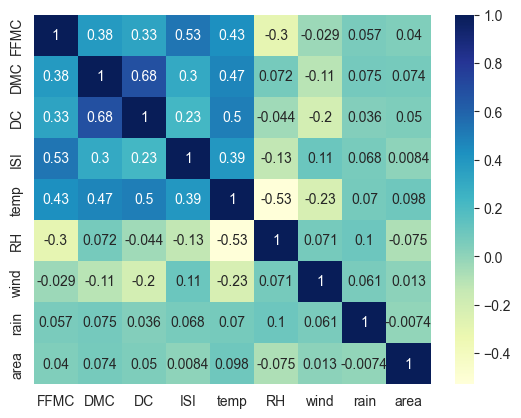

In [18]:
sns.heatmap(df.loc[:, numerical].corr(), cmap = 'YlGnBu', annot = True)

Text(0.5, 1.0, 'Target Value: BoxPlot')

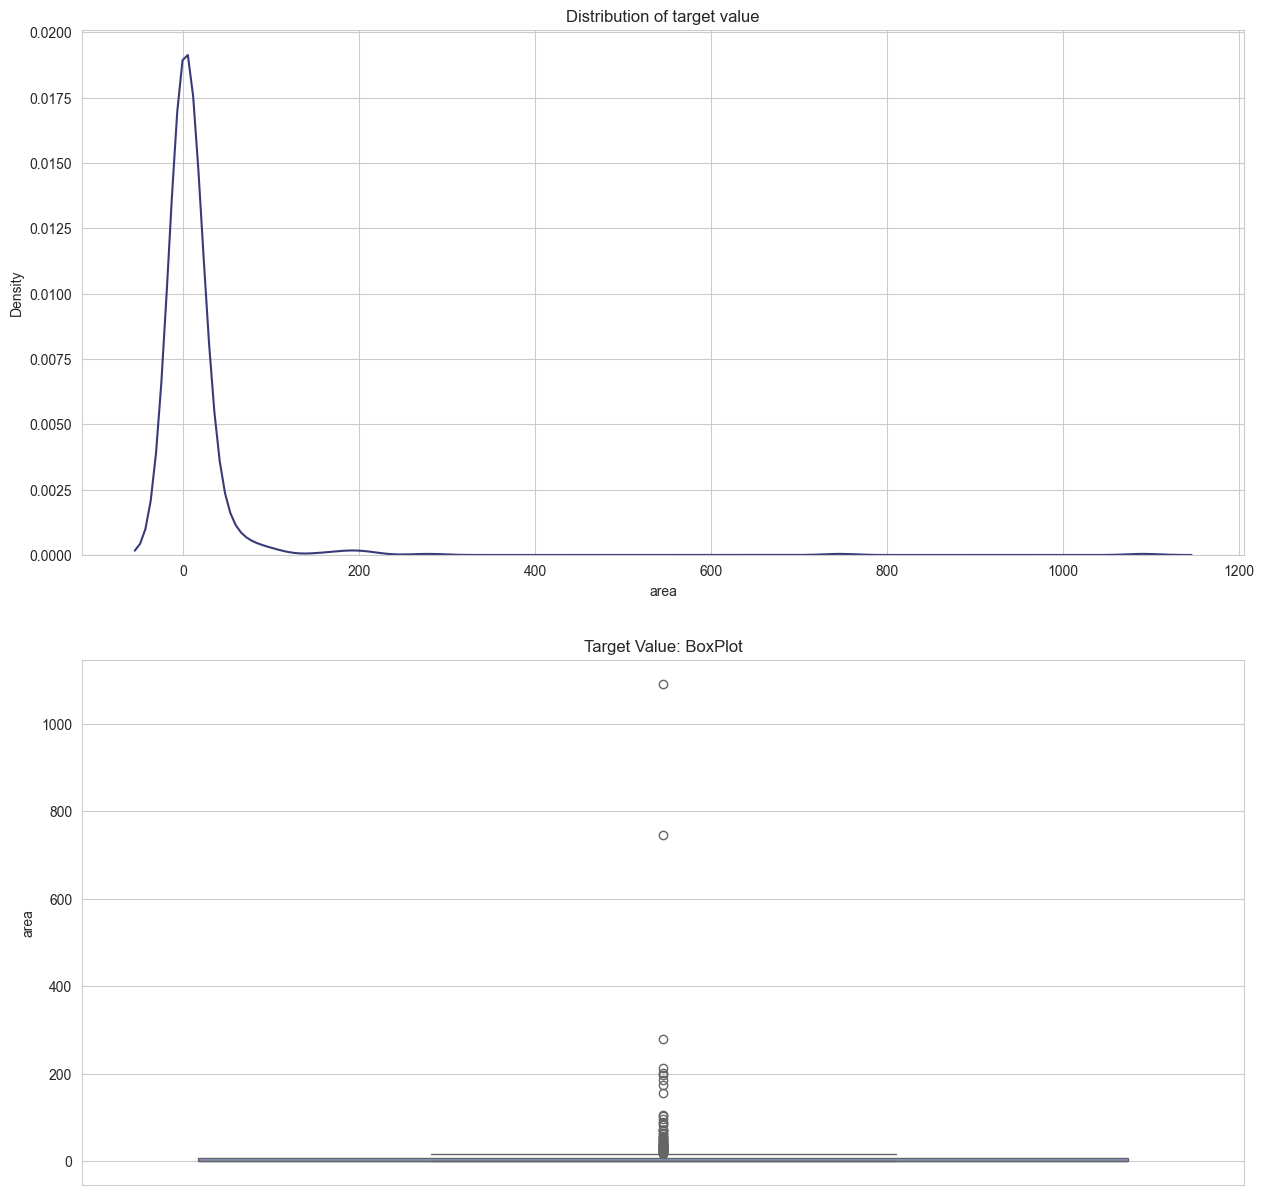

In [19]:
fig, axs = plt.subplots(nrows = 2, ncols = 1)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.kdeplot(df, x = 'area', ax = axs[0]).set_title('Distribution of target value')
sns.boxplot(df['area'], color='#7F95D1', ax = axs[1]).set_title('Target Value: BoxPlot')


As we see from distribution and boxplots of numerical data, there are a lot zero records as well as potential outliers. Some data has asymmetric distribution, therefore, standardization and logarithmization were used to normalize the distribution

Для змінних з “сильно” асиметричним розподілом підібрати нелінійне перетворення для нормалізації розподілу

Text(0.5, 1.0, 'After')

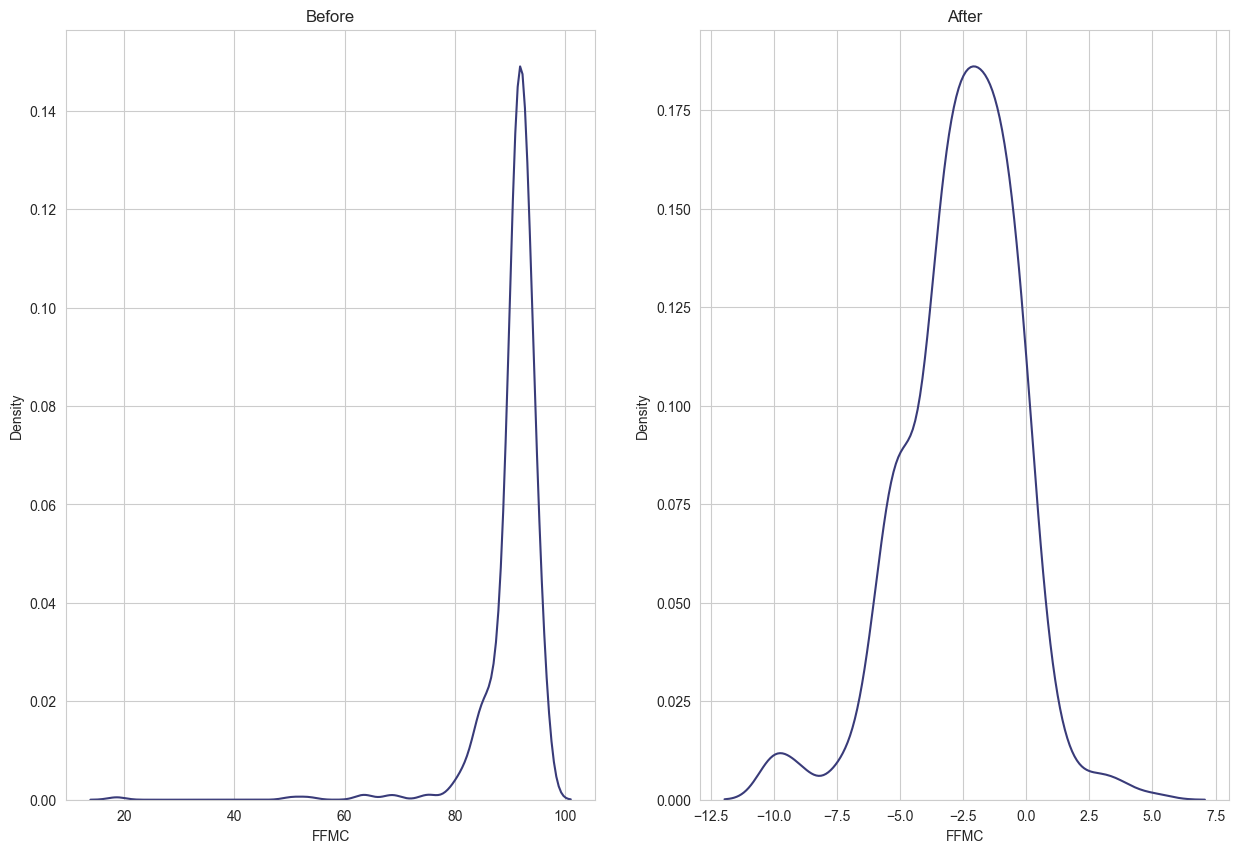

In [20]:
a = df['FFMC'].map(lambda x: (x - statistics.mean(df['FFMC']))/statistics.stdev(df['FFMC']))
fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)
sns.kdeplot(df['FFMC'], ax = axs[0]).set_title('Before')
sns.kdeplot(a.map(lambda x: math.log(x**2)), ax = axs[1]).set_title('After')

Text(0.5, 1.0, 'After')

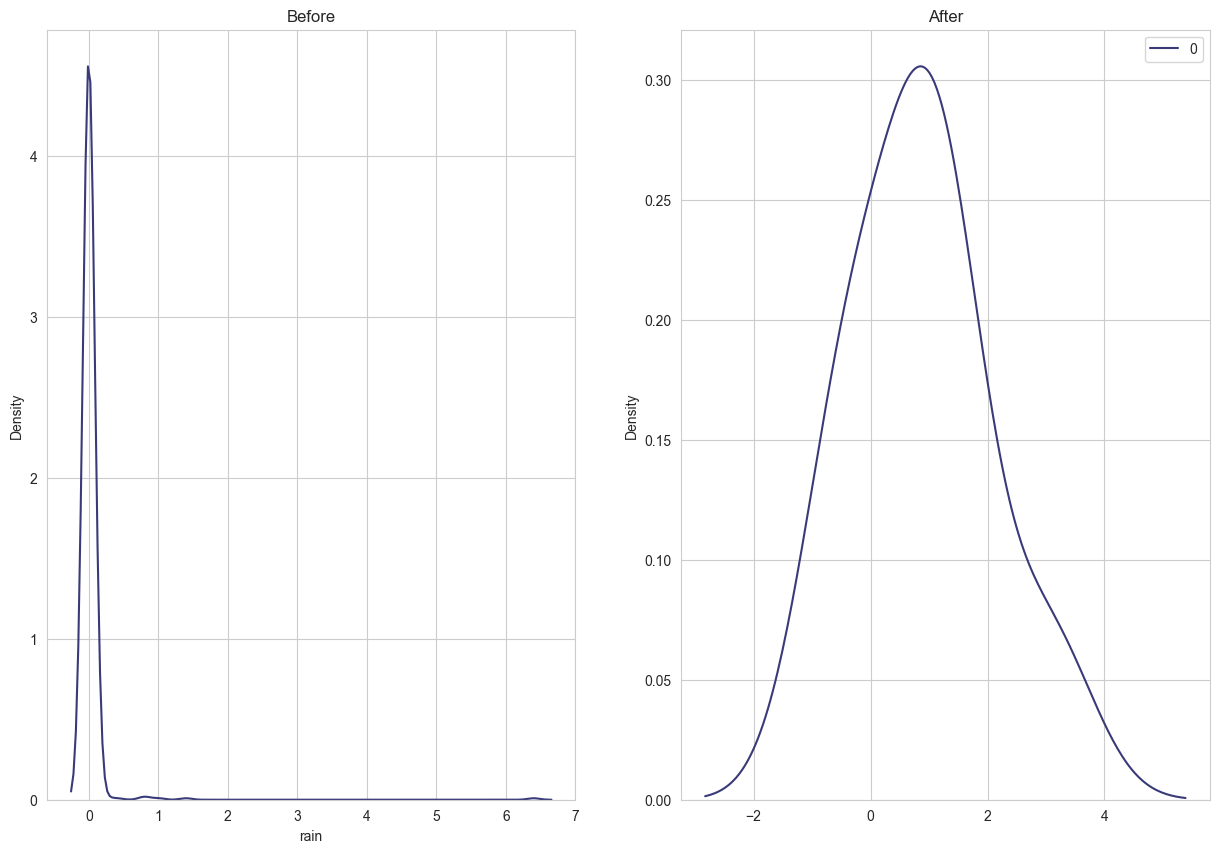

In [21]:
scaler = StandardScaler()
standart = scaler.fit_transform(df[['rain']])
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.kdeplot(df['rain'], ax=axs[0]).set_title('Before')
sns.kdeplot(np.log(standart), ax = axs[1]).set_title('After')

Для категоріальних змінних: оцінити розподіл та баланс категорій, кількість пропущених даних  

To assess the distribution and balance of categories, a histogram was used, which shows that some categories are represented by too little data, which distribution is not evenly distributed

ValueError: The following variable cannot be assigned with wide-form data: `hue`

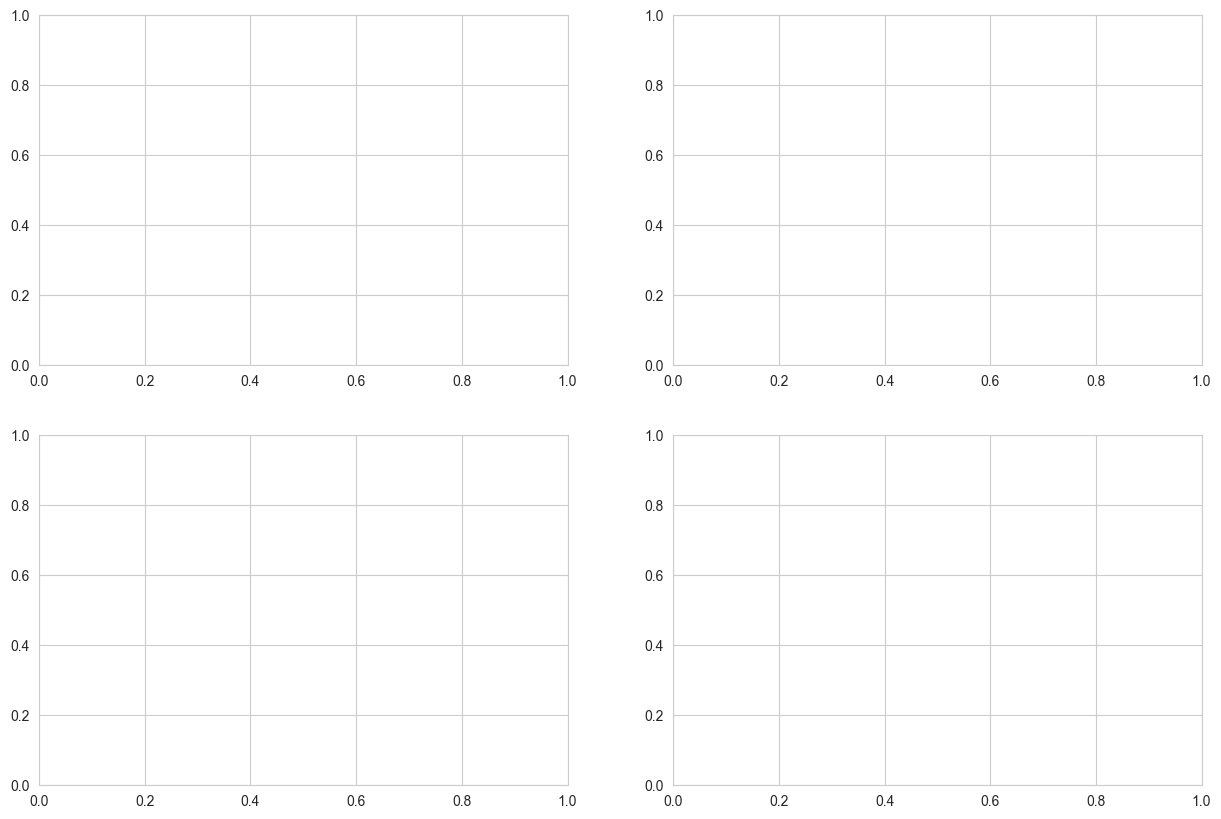

In [36]:
visualize(df.loc[:,categorical], sns.histplot, hue = ['Y'])

Побудувати матрицю кореляції між числовими змінними (в тому числі з вихідною), зробити висновки

<Axes: >

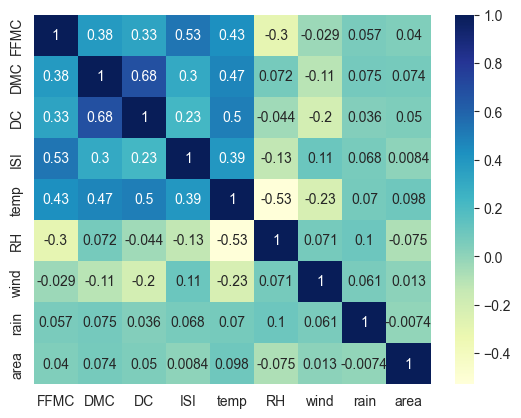

In [23]:
sns.heatmap(df.loc[:, numerical].corr(), cmap = 'YlGnBu', annot = True)

Relationship between the most between the two most correlated features were represented using relplot

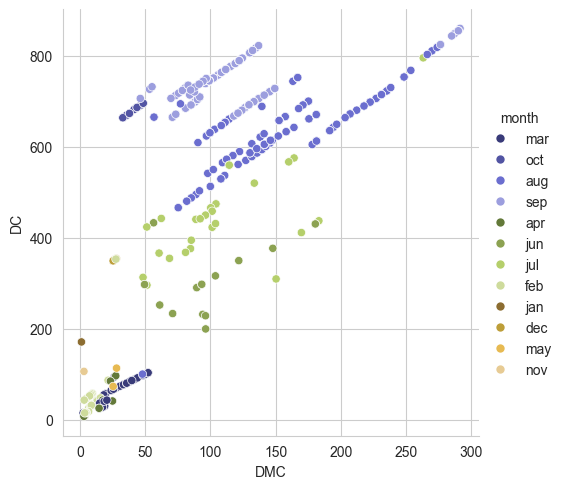

In [24]:
sns.relplot(df, x = 'DMC', y = 'DC', hue = 'month')

<Axes: xlabel='X', ylabel='Y'>

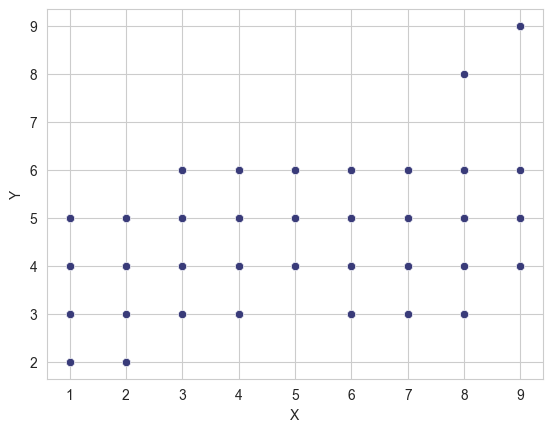

In [25]:
sns.scatterplot(x = df.loc[:, 'X'], y = df.loc[:,'Y'])

In [37]:
numerical[:-1]

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

Text(0.5, 1.0, 'Mutual Information Score between Numeric Features and Target Variable')

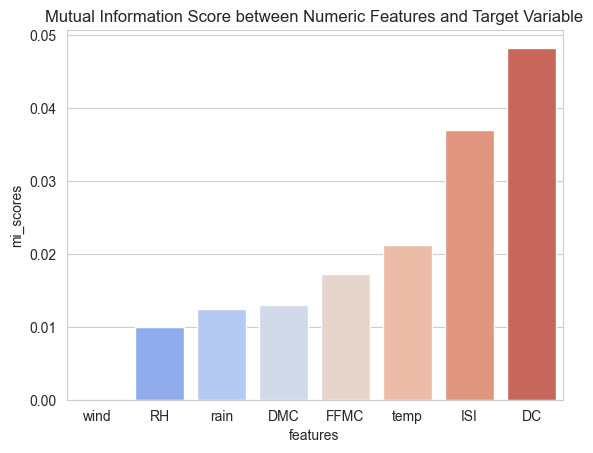

In [26]:
mi_scores = mutual_info_regression(df[numerical[:-1]], df['area'], random_state=42)
mi = pd.DataFrame(columns = ['features', 'mi_scores'])
mi['features'] = numerical[:-1]
mi['mi_scores'] = mi_scores
sns.barplot(x = mi['features'], y = mi['mi_scores'], order=mi.sort_values('mi_scores')['features'], palette = 'coolwarm')
plt.title('Mutual Information Score between Numeric Features and Target Variable')

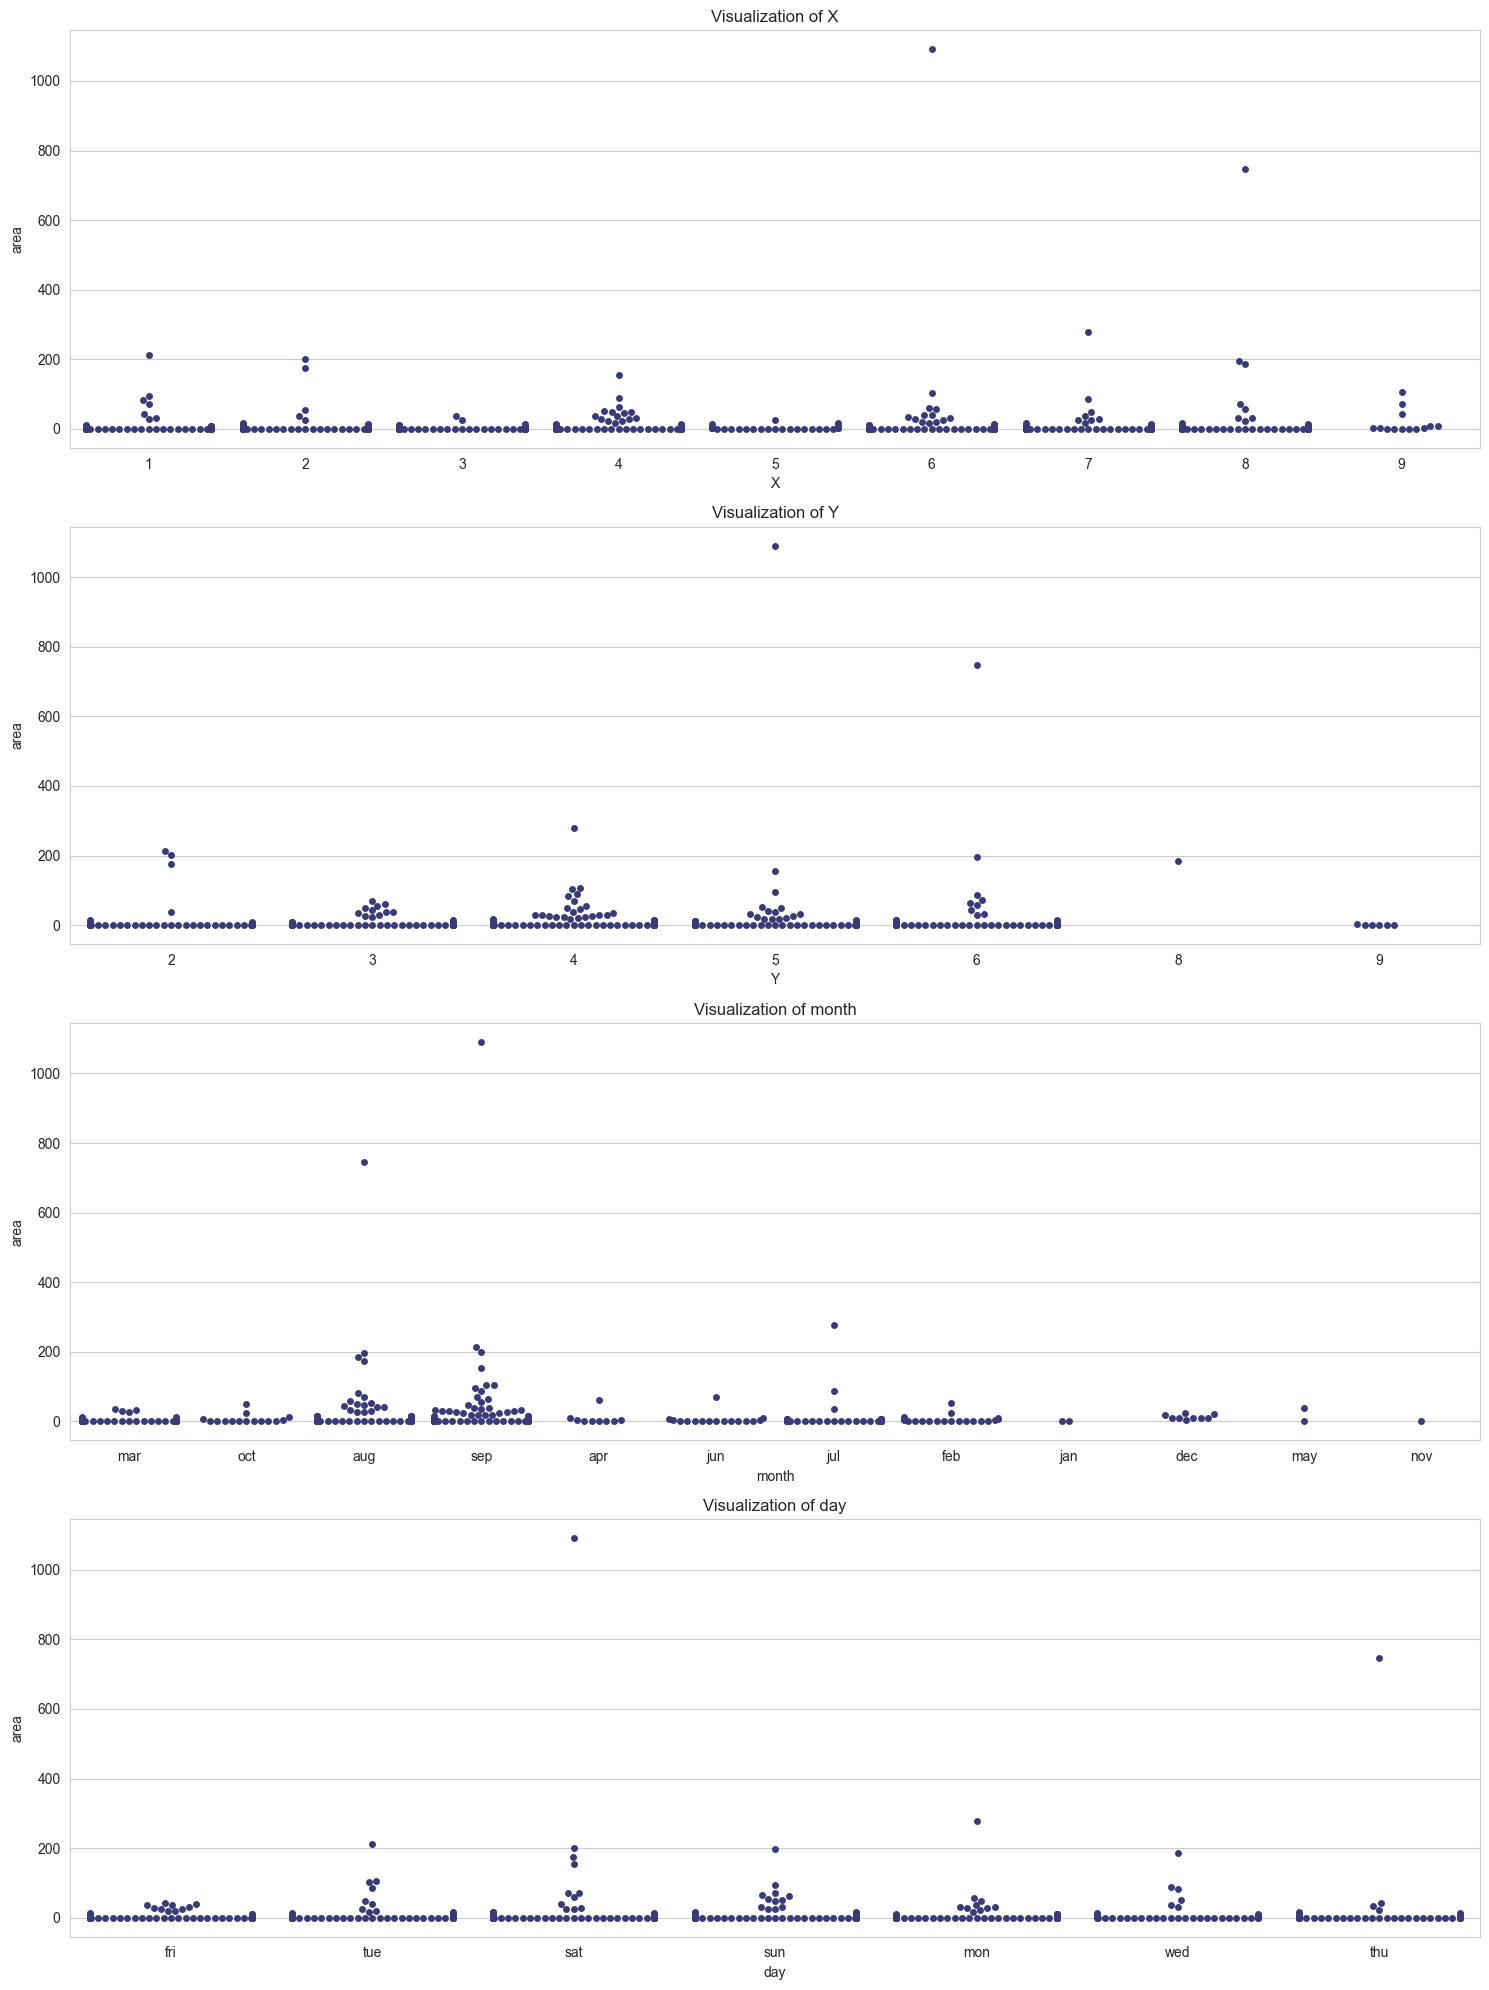

In [27]:
catplot_visualize(df.loc[:,['X', 'Y', 'month', 'day', 'area']], target = 'area', funk = sns.swarmplot)

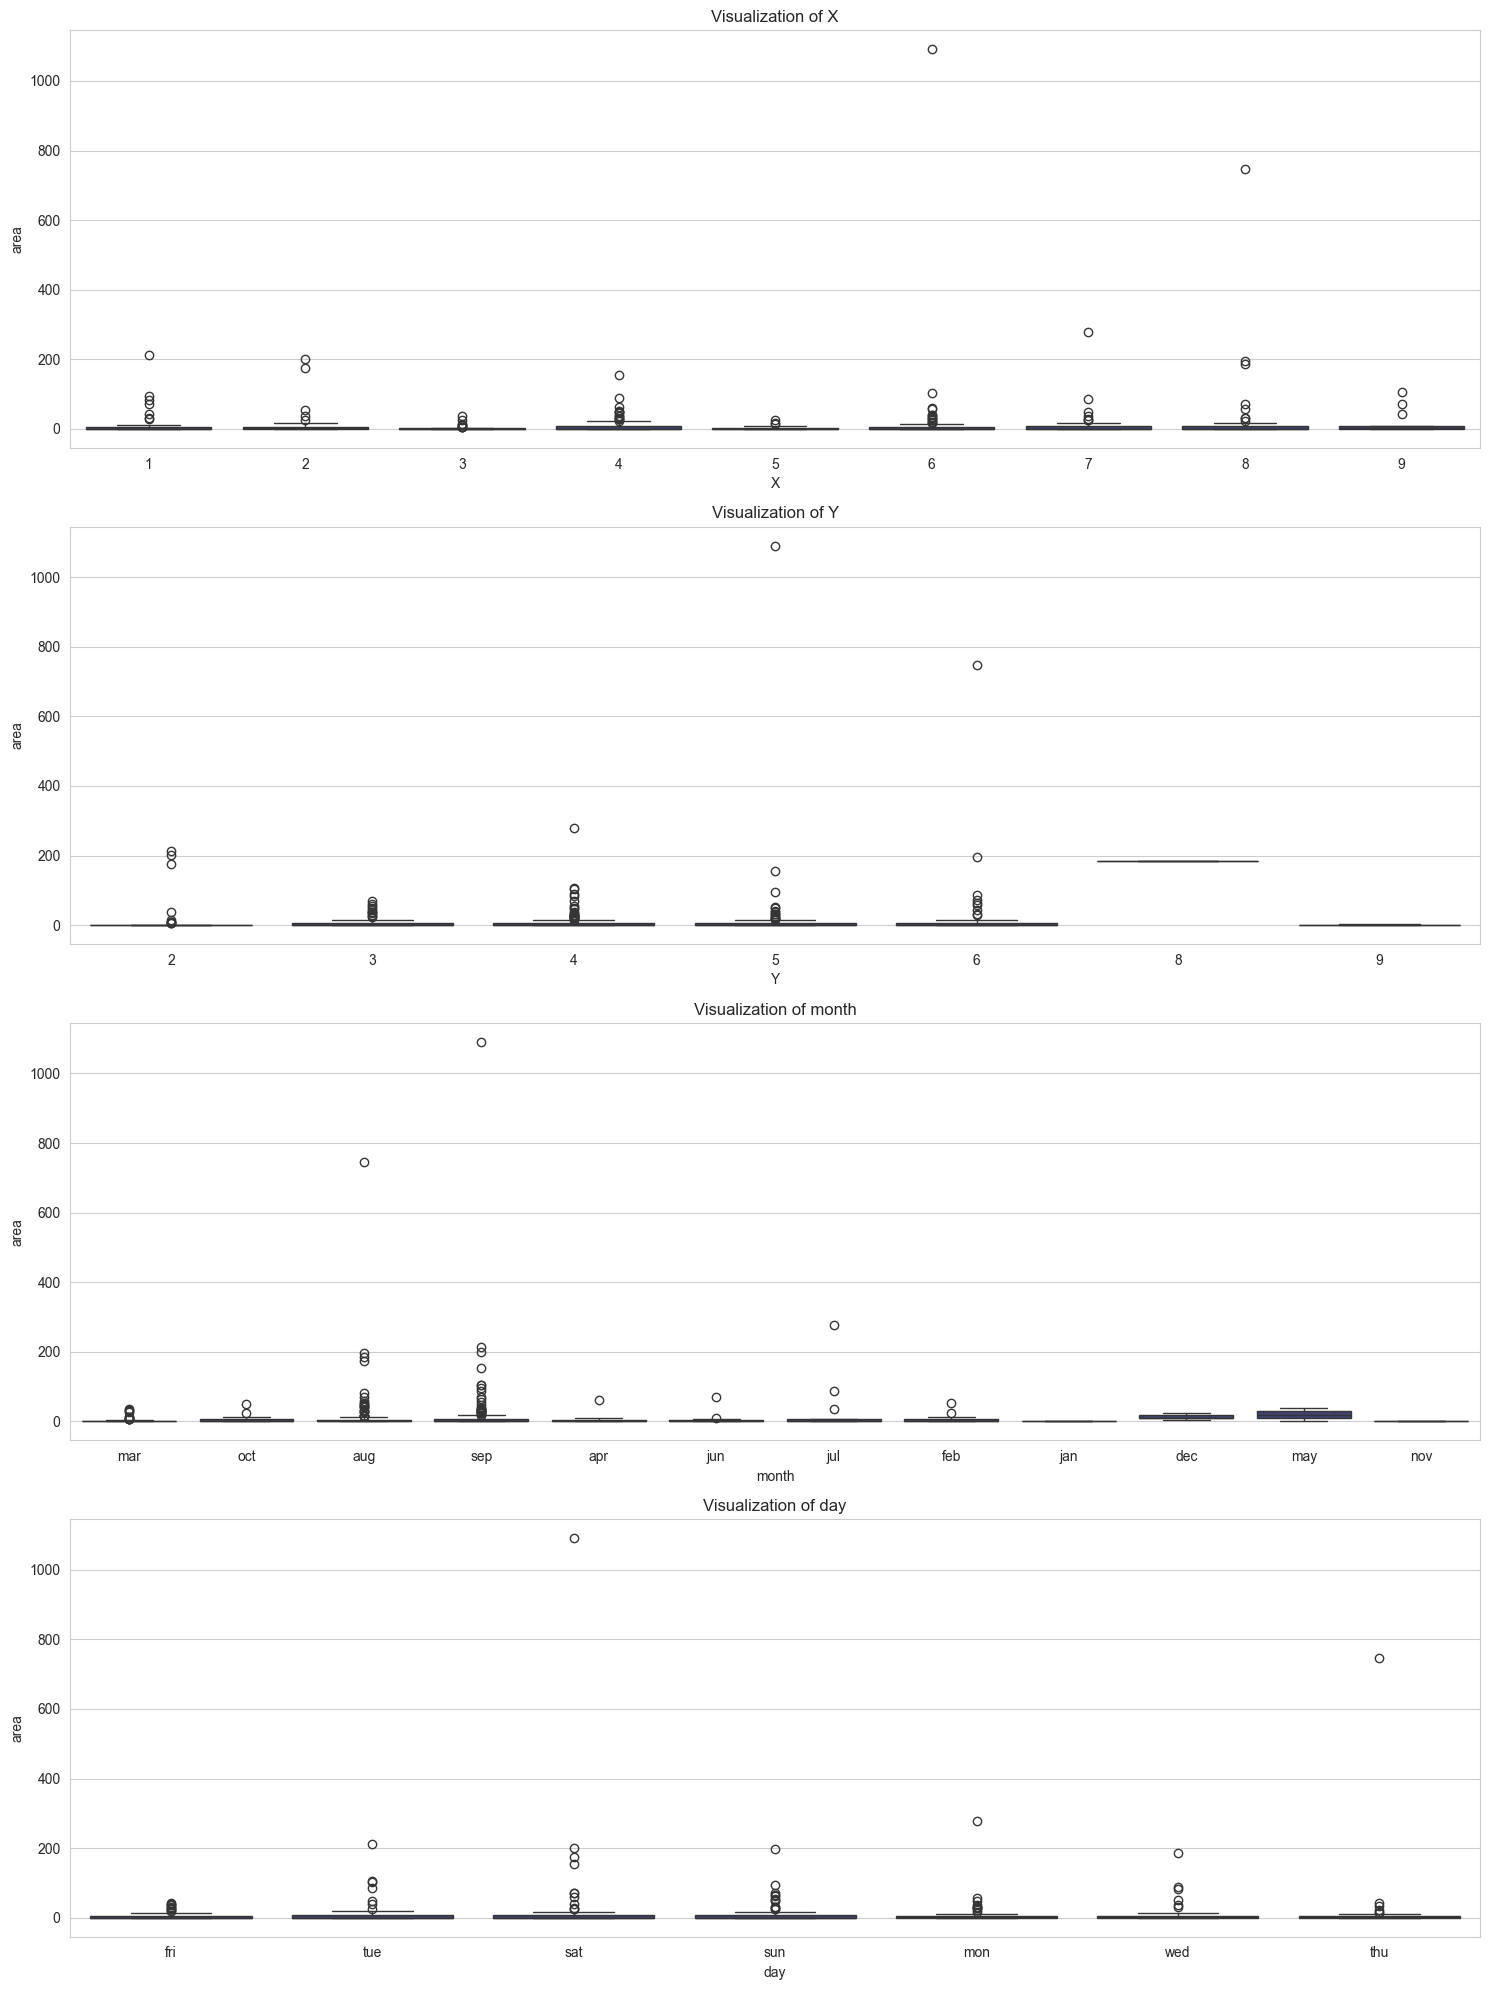

In [28]:
catplot_visualize(df.loc[:,['X', 'Y', 'month', 'day', 'area']], target = 'area', funk = sns.boxplot)

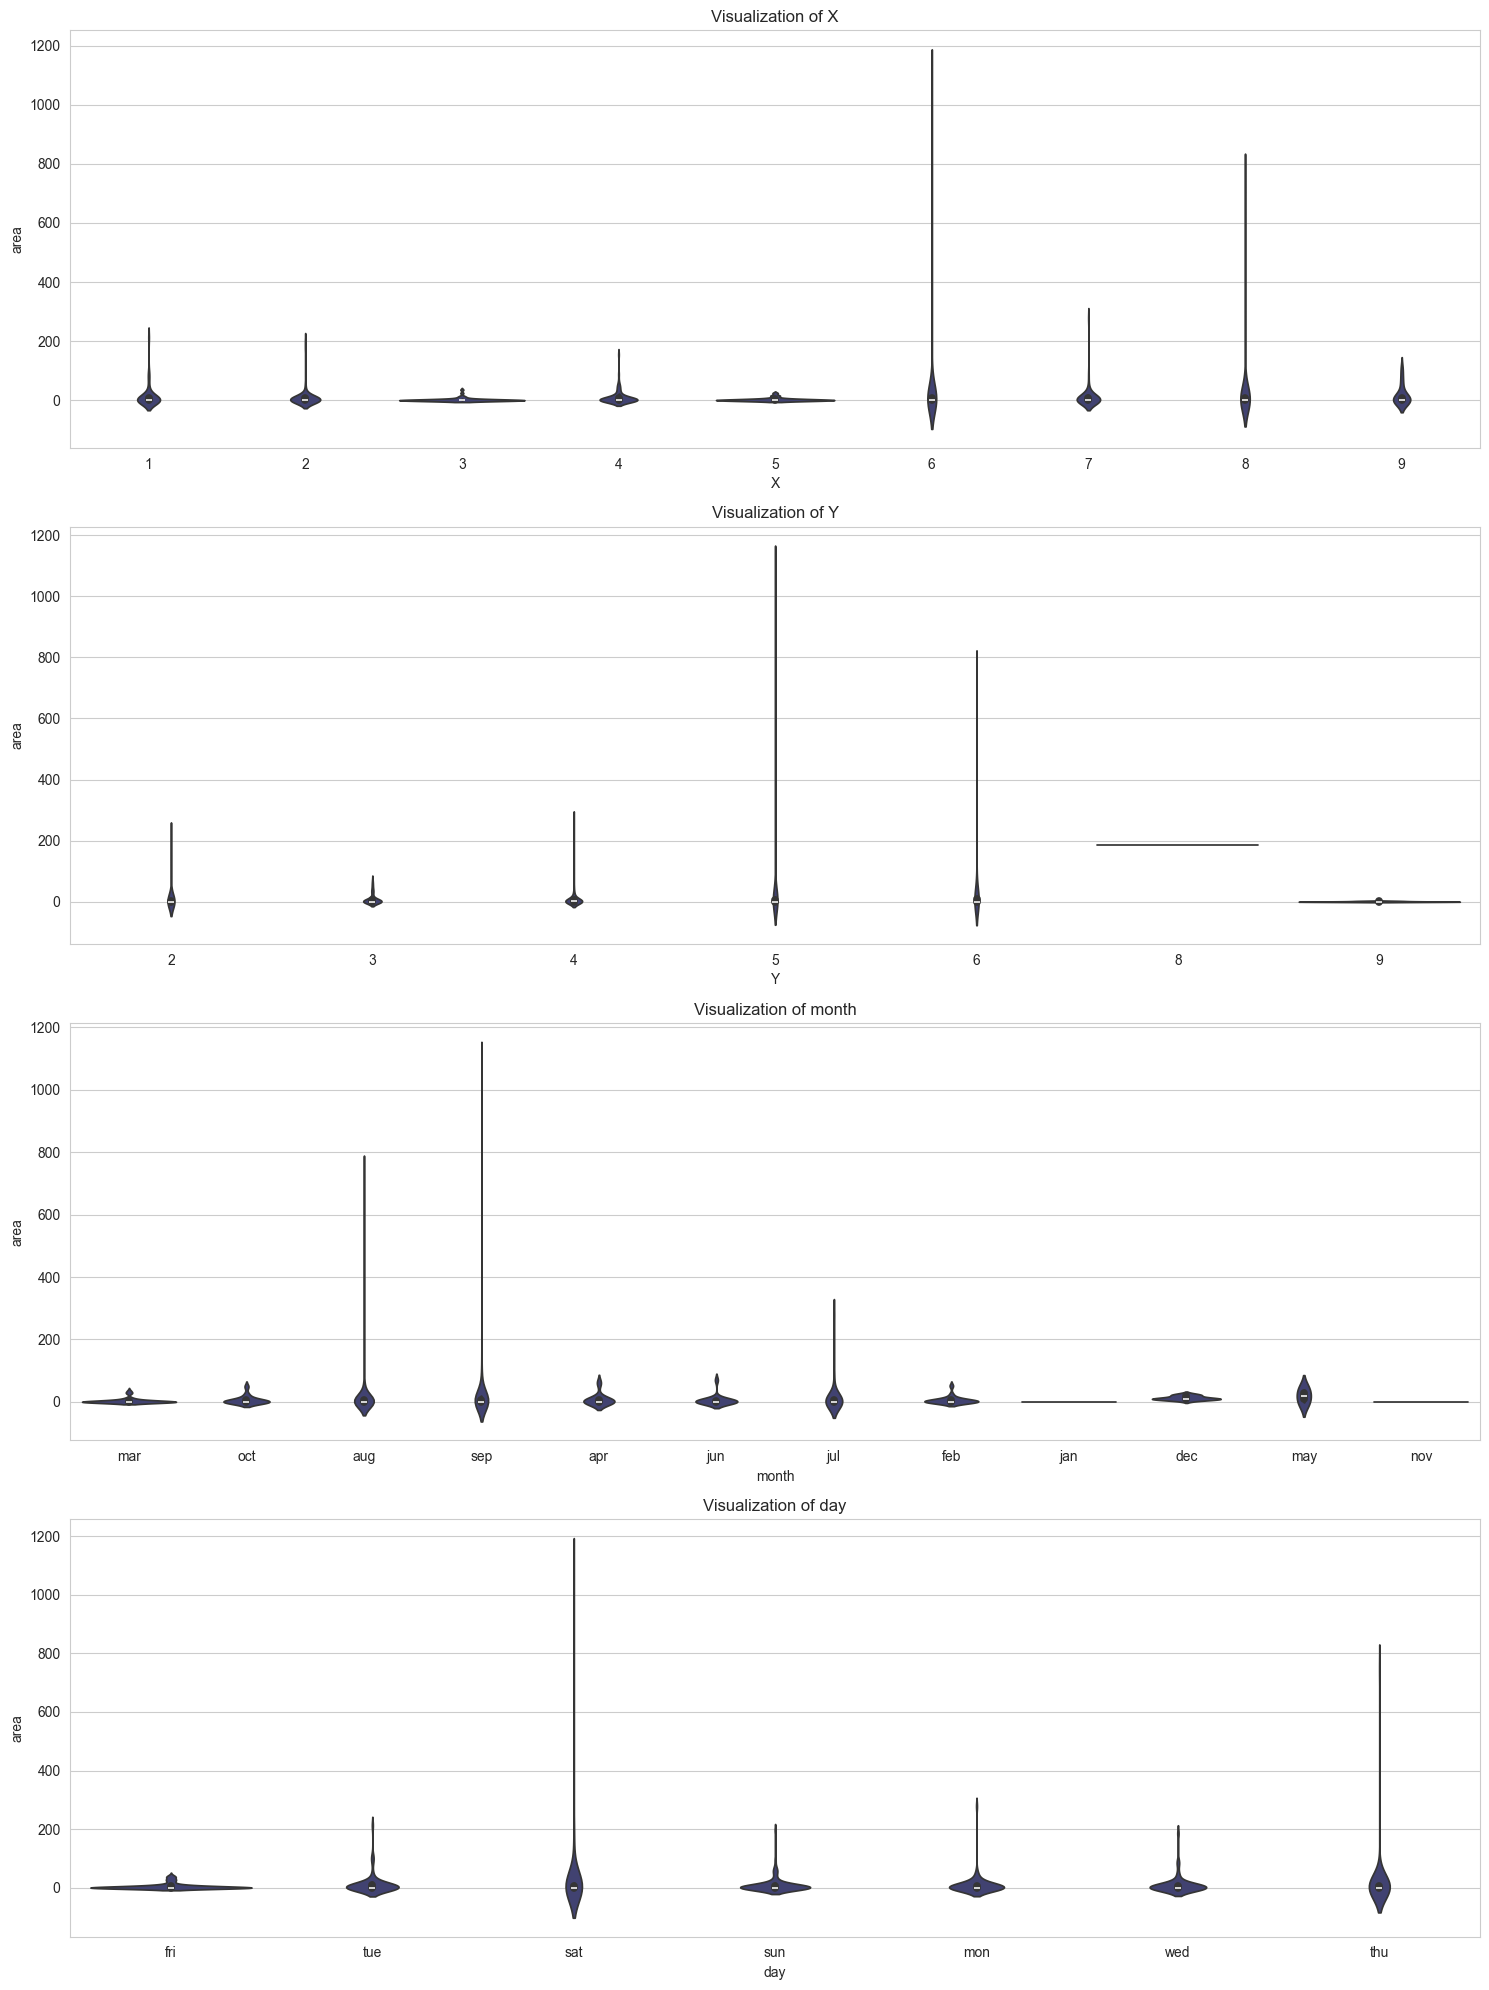

In [29]:
catplot_visualize(df.loc[:,['X', 'Y', 'month', 'day', 'area']], target = 'area', funk = sns.violinplot)

Провести статистичні тести (t-тест чи ANOVA чи H-тест) для оцінки значущості різниці значення вихідної змінної залежно від значення категоріальної змінної (додати p-значення на діаграму).

In [30]:
p_value = []
for day in pd.unique(df['day']):
    p_value.append(sp.ttest_ind(df.loc[df.day == day, 'area'], df.loc[df.day != day, 'area'])[1])
p_value

[0.2355808953610429,
 0.9712290353212673,
 0.04953532822543595,
 0.6532145724732976,
 0.6269500929977346,
 0.8124548285942682,
 0.6532645961195569]

In [31]:
ttest_results = pd.DataFrame(columns=[day for day in pd.unique(df['day'])])
ttest_results.loc[len(ttest_results.index)] = p_value
ttest_results

,fri,tue,sat,sun,mon,wed,thu
0,0.235581,0.971229,0.049535,0.653215,0.62695,0.812455,0.653265


<Axes: >

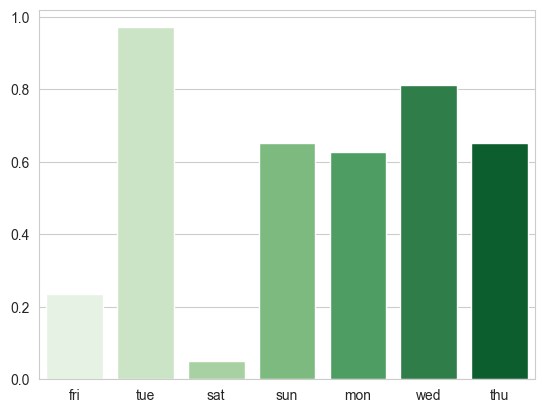

In [32]:
sns.barplot(ttest_results, palette='Greens')

In T-test we test 2 hypothesis. HO: Target value and Day value have identical average (expected) values; H1:Target value and Day doesn't have identical average (expected) values. The P-values we got are greater than 0.05, so we fail to reject H0, that means that our target value doesn't depend from Day.

Для обраної пари категоріальних змінних побудувати 2D розподіл, на її базі побудувати гіпотезу та протестувати її за χ² тестом.

<Axes: >

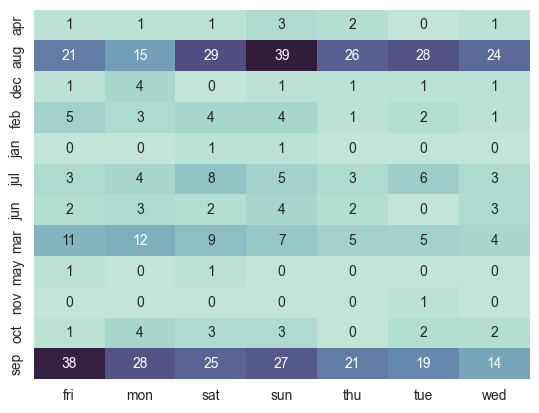

In [33]:
freq = sp.contingency.crosstab(df.loc[:, ['month']], df['day'])
sns.heatmap(freq.count, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
            fmt="d", xticklabels=freq.elements[1], yticklabels=freq.elements[0], square=False, cbar=False)

In [34]:
chi2_stat, p_val, dof, expected = sp.chi2_contingency(pd.crosstab(df['month'], df['day']))
p_val

0.5605025462238437

After the crosstab for 2 features: Day and Month was created, was made the decision to do Chi-Square Test of Independence. H0:There is no relationship between Day and Month; H1: There is relationship between Day and Month. P-value is greater than 0.05, so we fail to regect H0, that means that Day and Month are independent values.